In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set()
df_gscore = pd.read_csv('genome-scores.csv')
df_gtags = pd.read_csv('genome-tags.csv')
df_links = pd.read_csv('links.csv')
df_movies = pd.read_csv('movies.csv')
df_rating = pd.read_csv('ratings.csv')
df_tagspd = pd.read_csv('tags.csv')

In [91]:
df_gscore.info()
df_gscore['movieId'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


10381

In [82]:
df_gscore.relevance.describe()

count    1.170977e+07
mean     1.164833e-01
std      1.542463e-01
min      2.500000e-04
25%      2.425000e-02
50%      5.650000e-02
75%      1.415000e-01
max      1.000000e+00
Name: relevance, dtype: float64

In [92]:
df_gtags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [3]:
df_gtagscore=df_gtags.merge(df_gscore, how='right', on='tagId')
df_gtagscore.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11709768 entries, 0 to 11709767
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   tagId      11709768 non-null  int64  
 1   tag        11709768 non-null  object 
 2   movieId    11709768 non-null  int64  
 3   relevance  11709768 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 446.7+ MB


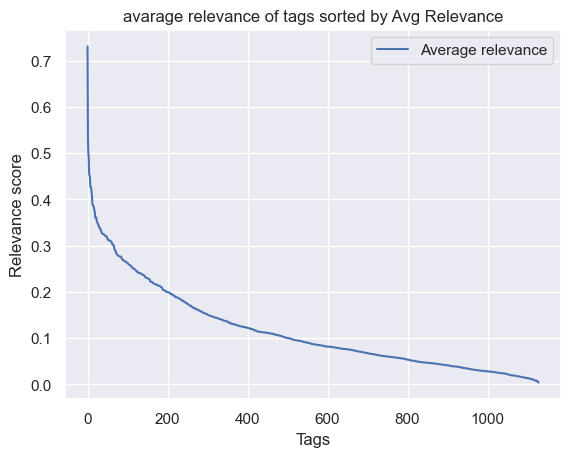

In [4]:
#plt.pyplot.figure(figsize=(10,10))
g =sns.lineplot(df_gtagscore.drop(['tagId','movieId'], axis=1).groupby(by='tag').mean().sort_values(by='relevance',ascending=False, ignore_index=True))
g.set(xlabel='Tags', ylabel='Relevance score', title='avarage relevance of tags sorted by Avg Relevance')
plt.pyplot.legend(labels=['Average relevance']);

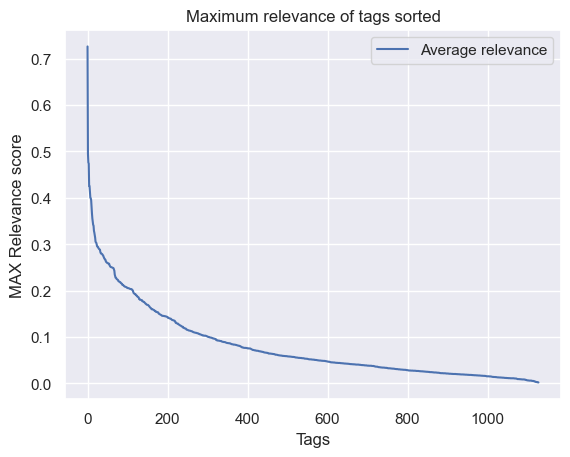

In [14]:
#plt.pyplot.figure(figsize=(10,10))
g =sns.lineplot(df_gtagscore.drop(['tagId','movieId'], axis=1).groupby(by='tag').median().sort_values(by='relevance',ascending=False, ignore_index=True))
g.set(xlabel='Tags', ylabel='median Relevance score', title='median relevance of tags sorted')
plt.pyplot.legend(labels=['median relevance']);

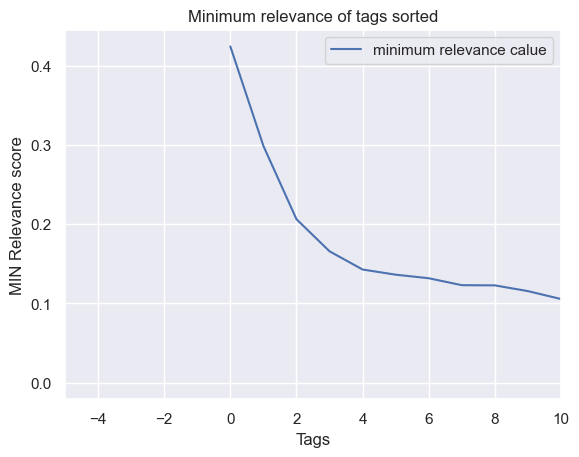

In [13]:
#plt.pyplot.figure(figsize=(10,10))
g =sns.lineplot(df_gtagscore.drop(['tagId','movieId'], axis=1).groupby(by='tag').min().sort_values(by='relevance',ascending=False, ignore_index=True))
g.set(xlabel='Tags', ylabel='MIN Relevance score', title='Minimum relevance of tags sorted', xlim=(-5,10))
plt.pyplot.legend(labels=['minimum relevance calue']);

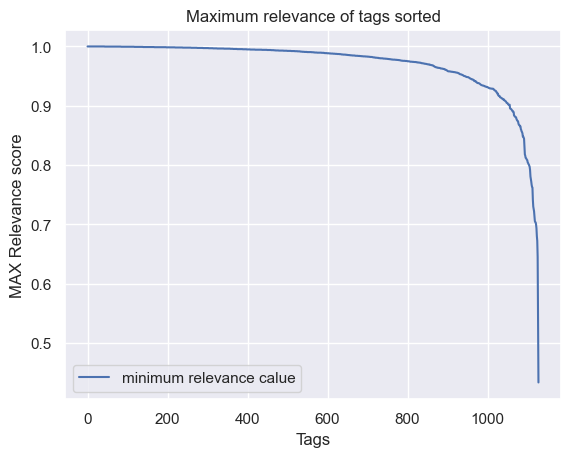

In [14]:
#plt.pyplot.figure(figsize=(10,10))
g =sns.lineplot(df_gtagscore.drop(['tagId','movieId'], axis=1).groupby(by='tag').max().sort_values(by='relevance',ascending=False, ignore_index=True))
g.set(xlabel='Tags', ylabel='MAX Relevance score', title='Maximum relevance of tags sorted')
plt.pyplot.legend(labels=['minimum relevance calue']);

In [93]:
df_links.info()
df_links['movieId'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


27278

In [94]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [4]:
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [38]:
df_movies = pd.read_csv('movies.csv')
df_movies.genres= df_movies.genres.str.split('|')

In [39]:
df_movies[df_movies['genres'].apply(lambda x: x == ['Children'])].count()

movieId    24
title      24
genres     24
dtype: int64

In [209]:
df_movies = pd.read_csv('movies.csv')
mask = df_movies['title'].str.contains('09–')
print(df_movies[mask].title.str[-4:-2])

22368    9–
Name: title, dtype: object


In [40]:
import numpy as np
df_movies = pd.read_csv('movies.csv')
df_movies.genres= df_movies.genres.str.split('|')
def condition(x):
    if x[-2:]=='a)':
        return np.nan
    elif x[-2:]=='l)':
        return np.nan
    elif x[-3:-1]=='7-':
        return 2007
    elif x[-4:-2]=='9–':
        return 2009
    elif x[-2:]=='))':
        return x[-6:-2]
    elif x[-1:]==')':
        return x[-5:-1]
    elif x[-1:]==' ':
        return x[-6:-2]
    else:
        return np.nan
df_movies['releaseyear'] = df_movies['title'].apply(condition)
#df_movies.title= df_movies.title.str[:-6]

In [37]:
df_movies['releaseyear'] = df_movies['releaseyear'].astype(str)
df_movies['releaseyear'].sort_values()

27015    1891
19213    1893
19085    1894
17631    1894
23796    1895
         ... 
26749     nan
10593     nan
26974     nan
26963     nan
26127     nan
Name: releaseyear, Length: 27278, dtype: object

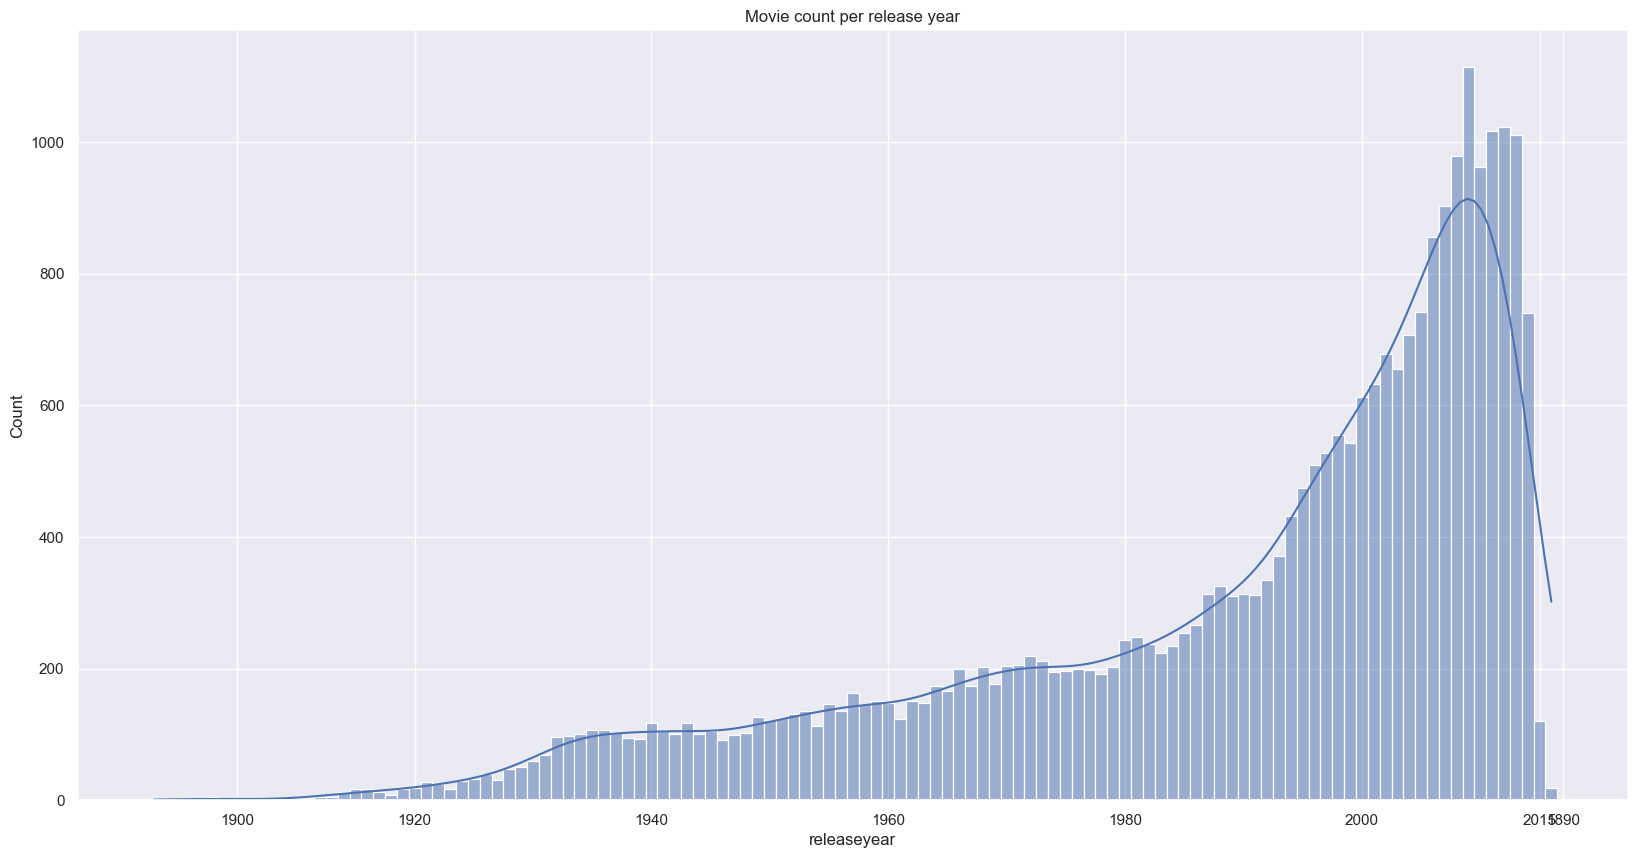

In [65]:
plt.pyplot.figure(figsize=(20, 10))
g=sns.histplot(data = df_movies, x=df_movies['releaseyear'].sort_values(), kde=True)
g.set(title= 'Movie count per release year', xticks=['1890','1900','1920','1940','1960','1980','2000','2015']);

In [71]:
df_movies02 = df_rating.merge(df_movies, how='left', on='movieId').drop(['userId','movieId','timestamp','title','genres'], axis=1).dropna()
#df_movies02.info(show_counts=True)

In [86]:
df_movies02.releaseyear=df_movies02.releaseyear.astype(str)

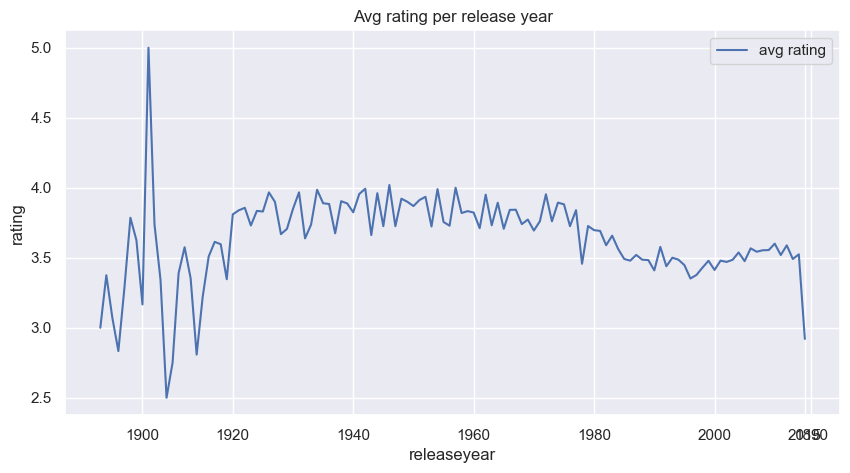

In [104]:
plt.pyplot.figure(figsize=(10, 5))
g=sns.lineplot(df_movies02.groupby('releaseyear').mean())
g.set(title= 'Avg rating per release year', ylabel='rating', xticks=['1890','1900','1920','1940','1960','1980','2000','2015'])
plt.pyplot.legend(labels=['avg rating']);

In [89]:
df_movies02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000172 entries, 0 to 20000262
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   rating       float64
 1   releaseyear  object 
dtypes: float64(1), object(1)
memory usage: 457.8+ MB


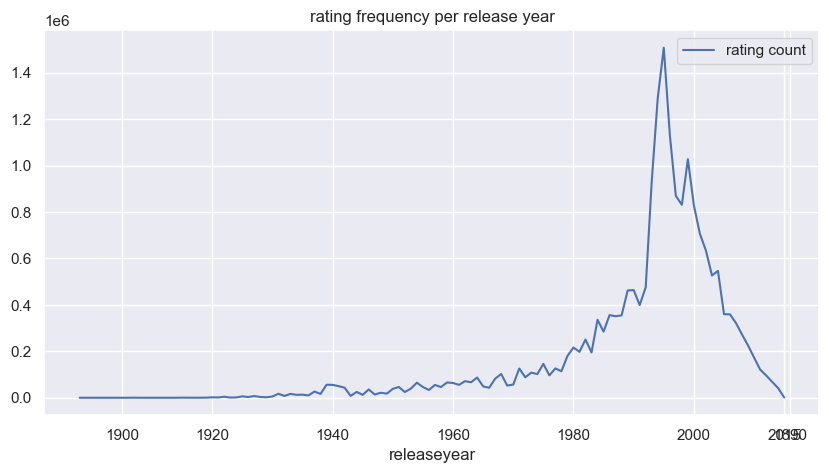

In [105]:
plt.pyplot.figure(figsize=(10, 5))
g=sns.lineplot(df_movies02.groupby('releaseyear').count())
g.set(title= 'rating frequency per release year', xticks=['1890','1900','1920','1940','1960','1980','2000','2015'])
plt.pyplot.legend(labels=['rating count']);

ConversionError: Failed to convert value(s) to axis units: ['1890', '1900', '1920', '1940', '1960', '1980', '2000', '2015']

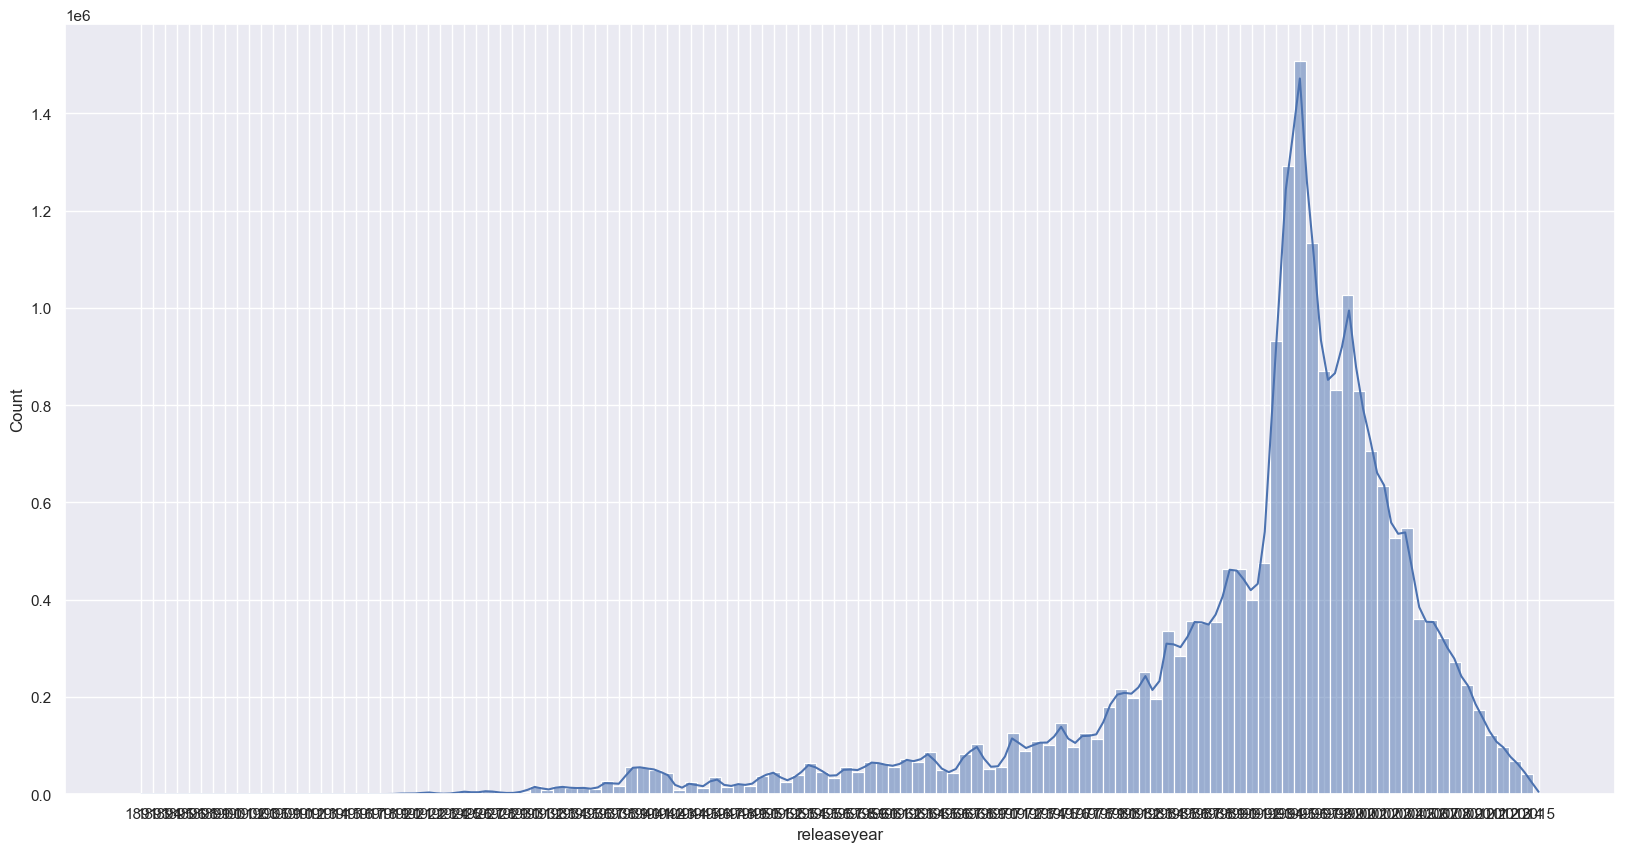

In [77]:
plt.pyplot.figure(figsize=(20, 10))
sns.histplot(data=df_movies02,x=df_movies02['releaseyear'].sort_values(), kde=True)
g.set(title= 'Movie count per release year', xticks=['1890','1900','1920','1940','1960','1980','2000','2015']);

In [34]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [28]:
#merging movies and rating
df_MoviesRating = df_rating.merge(df_movies, how='left', on='movieId')
df_MoviesRating.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     20000263 non-null  int64  
 1   movieId    20000263 non-null  int64  
 2   rating     20000263 non-null  float64
 3   timestamp  20000263 non-null  int64  
 4   title      20000263 non-null  object 
 5   genres     20000263 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ GB


In [29]:
#rating frequency on genre
df4graph=df_MoviesRating.genres.explode().value_counts(normalize=True)

C:\Users\HamidEsfahlani\AppData\Local\Temp\ipykernel_7496\3146664929.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(title= 'Amount of rating per genre',xlabel='Amount of total ratings in procent', ylabel='genres', xticklabels=['0%','2%','4%','6%','8%','10%','12%','14%','16%']);


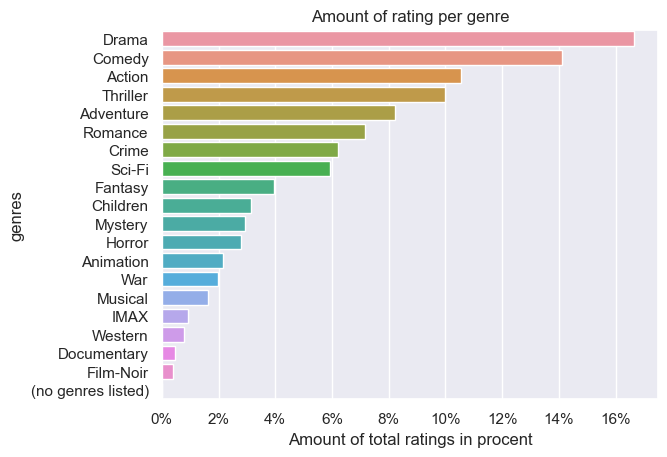

In [60]:
g=sns.barplot(y=df4graph.index, x=df4graph)
g.set(title= 'Amount of rating per genre',xlabel='Amount of total ratings in procent', ylabel='genres', xticklabels=['0%','2%','4%','6%','8%','10%','12%','14%','16%']);

In [30]:
RatingGenre= pd.concat([df_MoviesRating.drop('genres',axis=1), df_MoviesRating.genres.explode()], axis=1)
RatingGenre.head()

userId  movieId  rating   timestamp  \
0       1        2     3.5  1112486027   
0       1        2     3.5  1112486027   
0       1        2     3.5  1112486027   
1       1       29     3.5  1112484676   
1       1       29     3.5  1112484676   

                                               title     genres  
0                                     Jumanji (1995)  Adventure  
0                                     Jumanji (1995)   Children  
0                                     Jumanji (1995)    Fantasy  
1  City of Lost Children, The (Cité des enfants p...  Adventure  
1  City of Lost Children, The (Cité des enfants p...      Drama

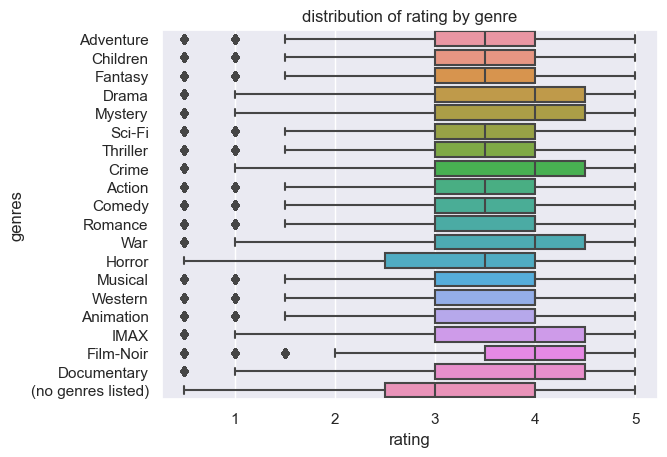

In [9]:
g= sns.boxplot(y='genres', x='rating', data=RatingGenre)
g.set(title='distribution of rating by genre');

In [31]:
# movie counts by genre
#g=sns.barplot(y=df_movies.genres.explode(), x=df_movies.movieId)
df_moviegenres= pd.concat([df_movies.drop('genres',axis=1), df_movies.genres.explode()], axis=1)
df_moviegenres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54406 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  54406 non-null  int64 
 1   title    54406 non-null  object
 2   genres   54406 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


C:\Users\HamidEsfahlani\AppData\Local\Temp\ipykernel_19048\841817197.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(title='Movie count per Genre', xlabel='Amount of total movies in procent', ylabel='genres', xticklabels=['0%','5%','2%','15%','20%','25%']);


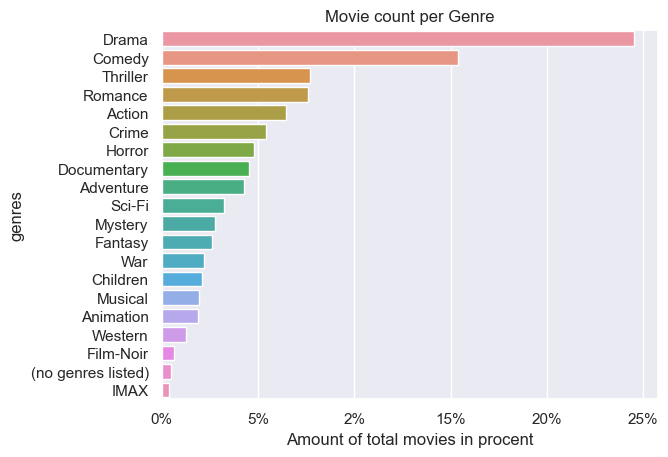

In [68]:
df_MovieVsGenres=df_moviegenres.genres.value_counts(normalize=True)
g=sns.barplot(y=df_MovieVsGenres.index, x=df_MovieVsGenres)
g.set(title='Movie count per Genre', xlabel='Amount of total movies in procent', ylabel='genres', xticklabels=['0%','5%','2%','15%','20%','25%']);

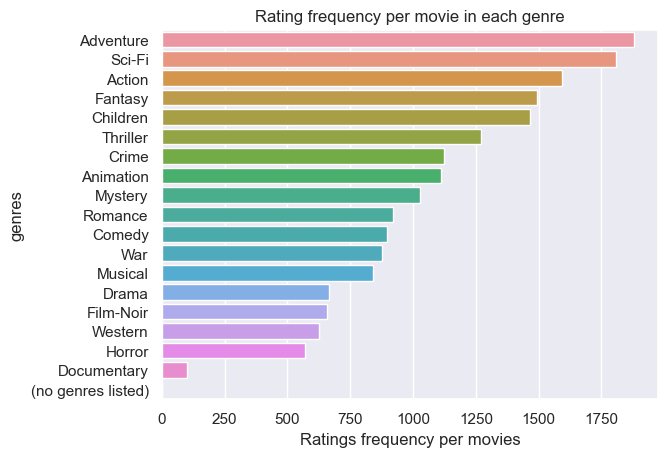

In [109]:
#rating count per movie in every Genre
df_ratingcountVsMovieinGenres=(df_MoviesRating.genres.explode().value_counts()/df_moviegenres.genres.value_counts()).drop('IMAX').sort_values(ascending=False)
g=sns.barplot(y=df_ratingcountVsMovieinGenres.index, x=df_ratingcountVsMovieinGenres)
g.set(title='Rating frequency per movie in each genre', xlabel='Ratings frequency per movies', ylabel='genres');

In [97]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [69]:
#rating frequencie by user
UserVsRating = df_rating.userId.value_counts()
UserVsRating

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: userId, Length: 138493, dtype: int64

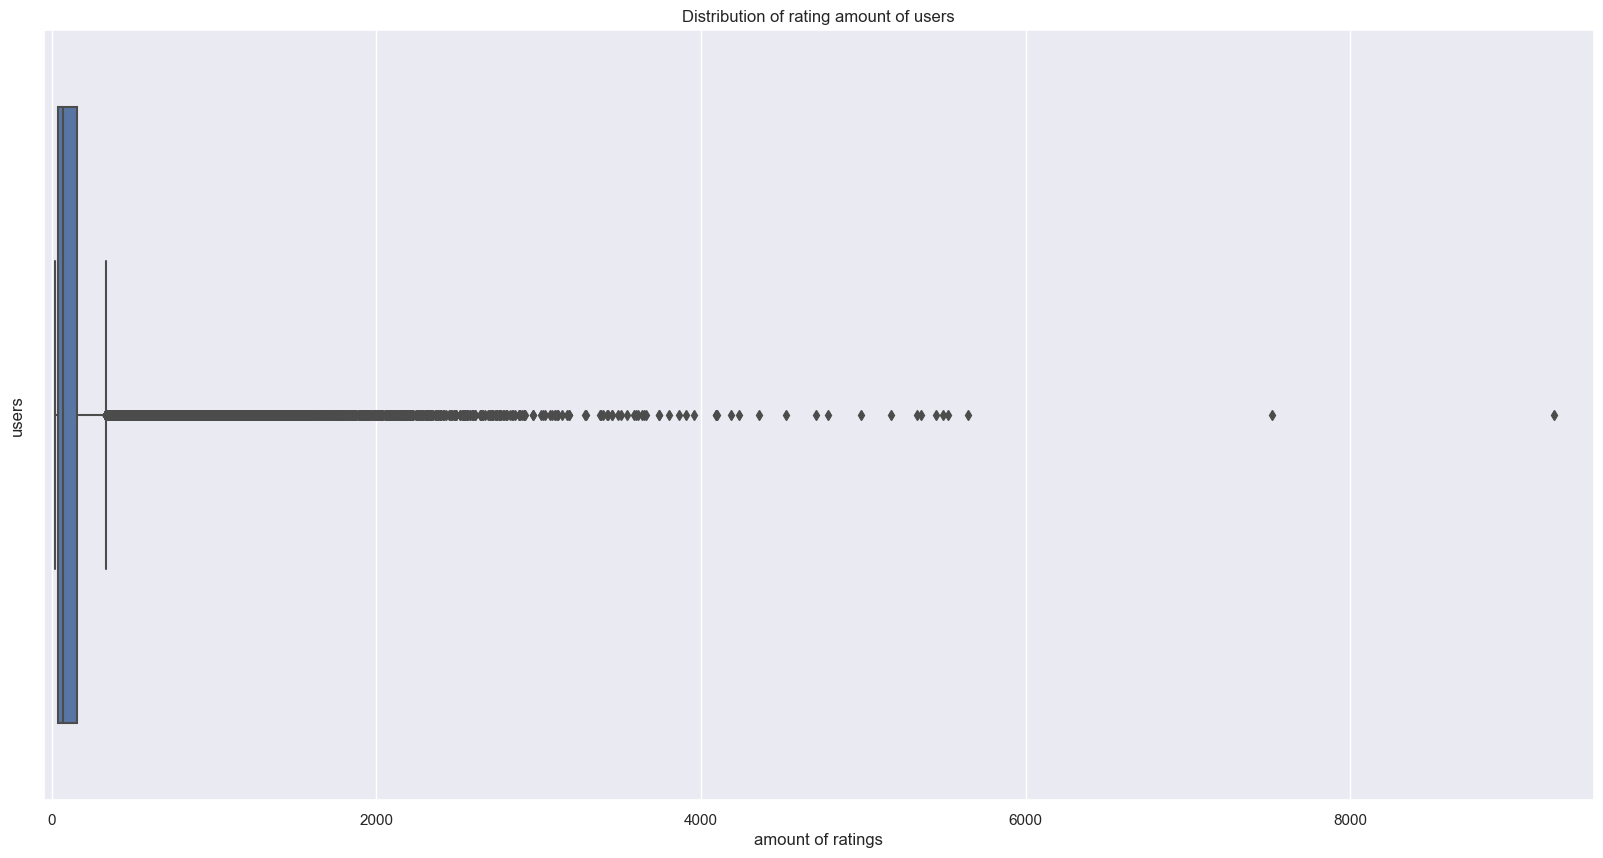

In [73]:
plt.pyplot.figure(figsize=(20, 10))
p= sns.boxplot(x=UserVsRating)
p.set(title='Distribution of rating amount of users', xlabel='amount of ratings', ylabel='users', xlim=[-50,9500]);

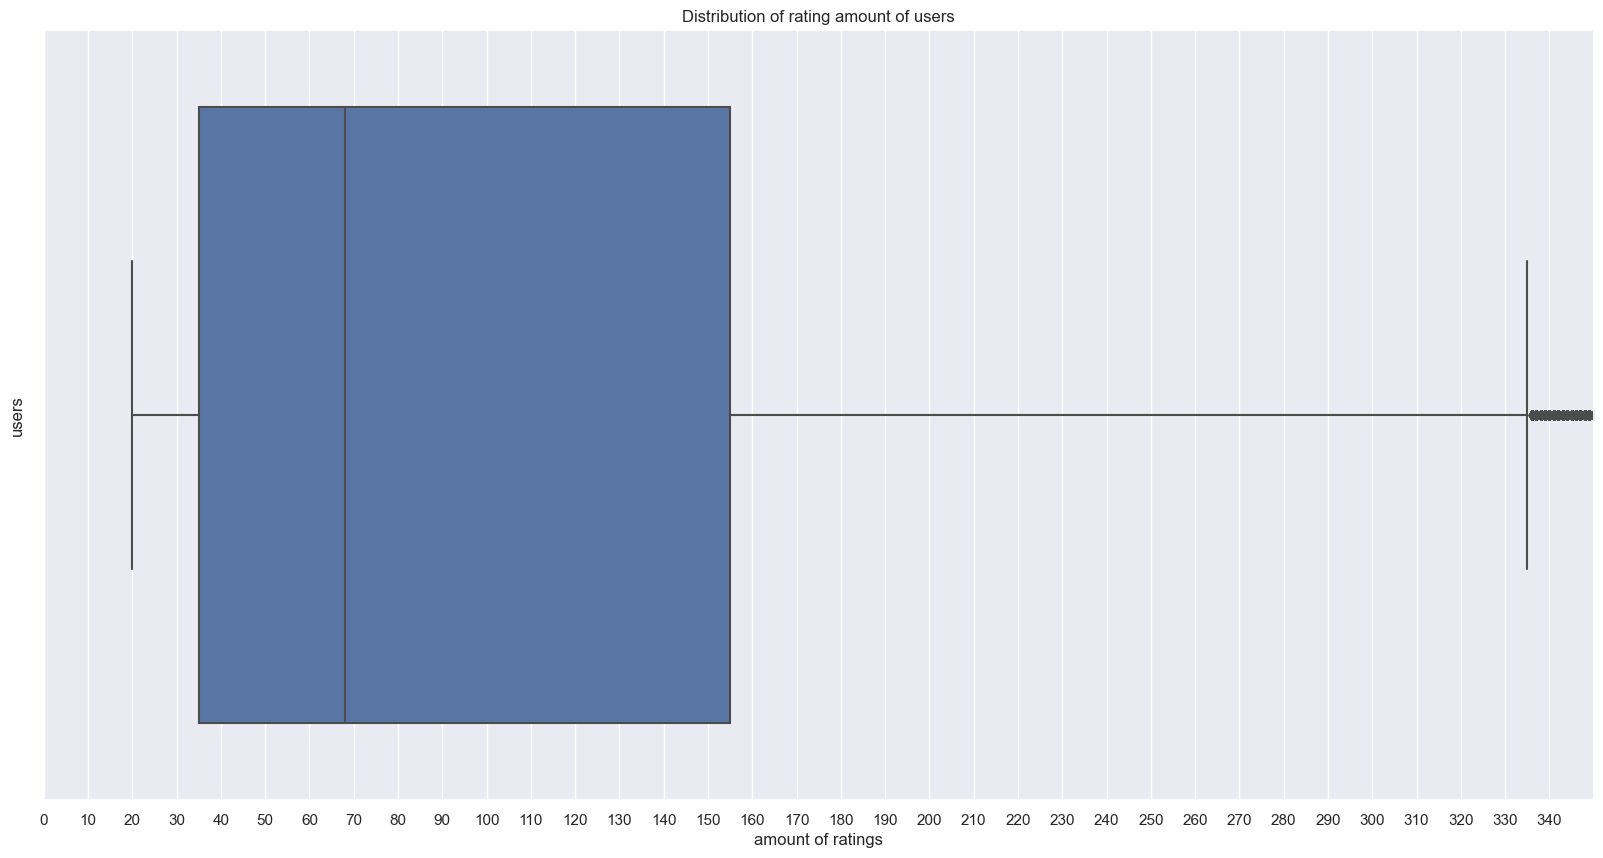

In [59]:
plt.pyplot.figure(figsize=(20, 10))
p= sns.boxplot(x=UserVsRating)
p.set(title='Distribution of rating amount of users', xlabel='amount of ratings', ylabel='users', xlim=(0,350), xticks=range(0,350,10));

In [57]:
print(f'{UserVsRating[UserVsRating>335].size} users have rated overproportionaly and are considered as outlier')
print('this is about %.2f procent of total users which have given up any rating' % ((UserVsRating[UserVsRating>335].size)*100/UserVsRating.size))

13781 users have rated overproportionaly and are considered as outlier
this is about 9.95 procent of total users which have given up any rating


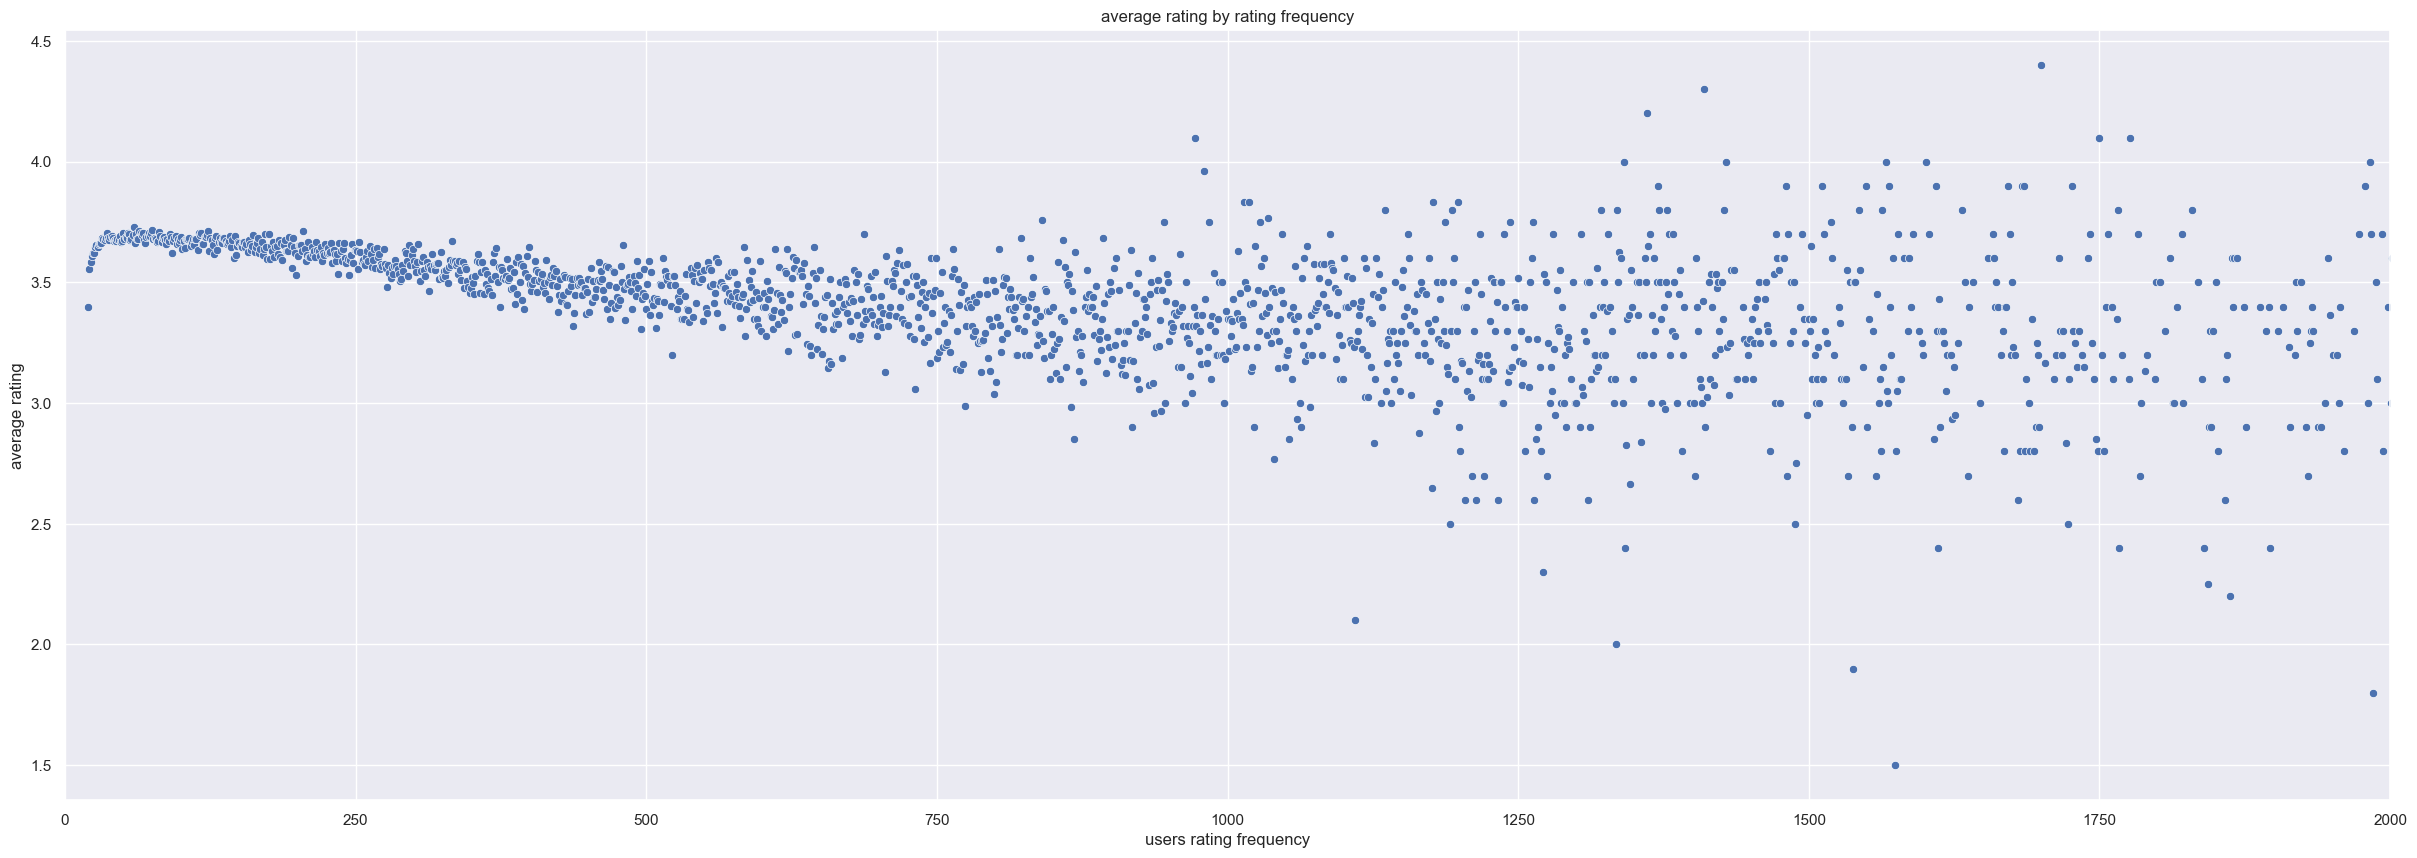

In [91]:
#Avarage rating by rating frequency
UserAvgRating = df_rating.userId.value_counts().sort_values(ascending=False, ignore_index=False)
UserAvgRating = pd.concat([UserAvgRating, df_rating.groupby(by='userId').rating.mean().round(1)], axis=1)
UserAvgRating.sort_values(by=['userId'], axis=0, ascending=False, inplace=True, ignore_index=True)
UserAvgRating.rename(columns={'userId':'rating frequency'}, inplace=True)
UserAvgRating=UserAvgRating.groupby(by='rating frequency').mean()
plt.pyplot.figure(figsize=(30, 10))
g=sns.scatterplot(x='rating frequency', y='rating', data=UserAvgRating)
g.set(title='average rating by rating frequency', xlabel='users rating frequency', ylabel='average rating',xlim=(0,2000) );

In [98]:
df_rating['movieId'].nunique()

26744

rating are missing in 534 movies. can be replaces with 0 that means no rating 

"or p in g.ax.patches:\n    txt = str(p.get_height().round(2)) + '%'\n    txt_y = p.get_height()\n    txt_x = p.get_x()\n    g.ax.text(txt_x,txt_y,txt);"

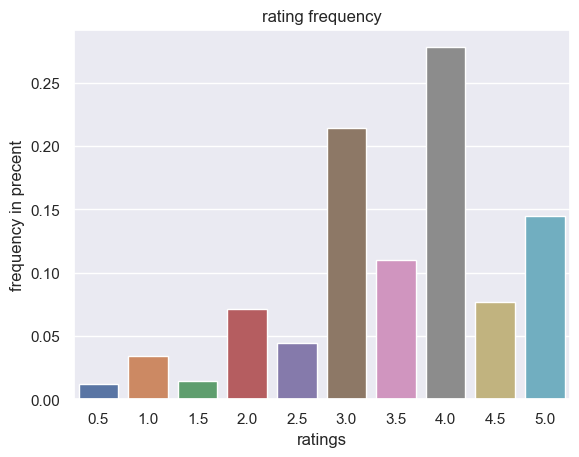

In [42]:
rating_counts = df_rating.rating.value_counts(normalize = True)
g = sns.barplot(x=rating_counts.index, y=rating_counts)
g.set(xlabel='ratings', ylabel='frequency in precent', title='rating frequency');
'''or p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_y = p.get_height()
    txt_x = p.get_x()
    g.ax.text(txt_x,txt_y,txt);'''

In [75]:
df_rating.rating.value_counts(normalize = True).sort_index()


0.5    0.011956
1.0    0.034036
1.5    0.013962
2.0    0.071549
2.5    0.044169
3.0    0.214557
3.5    0.110006
4.0    0.278093
4.5    0.076740
5.0    0.144931
Name: rating, dtype: float64

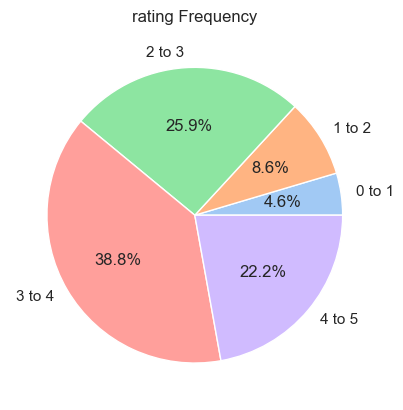

In [80]:
rating_counts = (df_rating.rating.value_counts(normalize = True).sort_index(ascending=False))
rating_counts_02 = pd.Series({'0 to 1': rating_counts.iloc[9]+rating_counts.iloc[8],
                 '1 to 2':rating_counts.iloc[7]+rating_counts.iloc[6],
                 '2 to 3':rating_counts.iloc[5]+rating_counts.iloc[4],
                 '3 to 4':rating_counts.iloc[3]+rating_counts.iloc[2],
                 '4 to 5':rating_counts.iloc[1]+rating_counts.iloc[0]})
plt.pyplot.pie(rating_counts_02, labels = rating_counts_02.index, colors = sns.color_palette('pastel')[0:5], autopct='%.1f%%')
plt.pyplot.title('rating Frequency')
plt.pyplot.show()

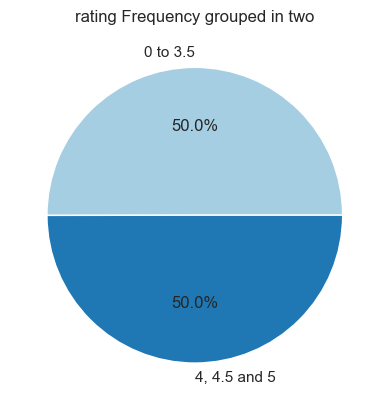

In [20]:
rating_counts = (df_rating.rating.value_counts(normalize = True).sort_index(ascending=False))
rating_counts_03 = pd.Series({'0 to 3.5': rating_counts.iloc[9]+rating_counts.iloc[8] + rating_counts.iloc[7]+rating_counts.iloc[6] + rating_counts.iloc[5]+rating_counts.iloc[4] +rating_counts.iloc[3], 
                 '4, 4.5 and 5':rating_counts.iloc[2] + rating_counts.iloc[1]+rating_counts.iloc[0]})
plt.pyplot.pie(rating_counts_03, labels = rating_counts_03.index, colors = sns.color_palette('Paired')[0:3], autopct='%.1f%%')
plt.pyplot.title('rating Frequency grouped in two')
plt.pyplot.show()

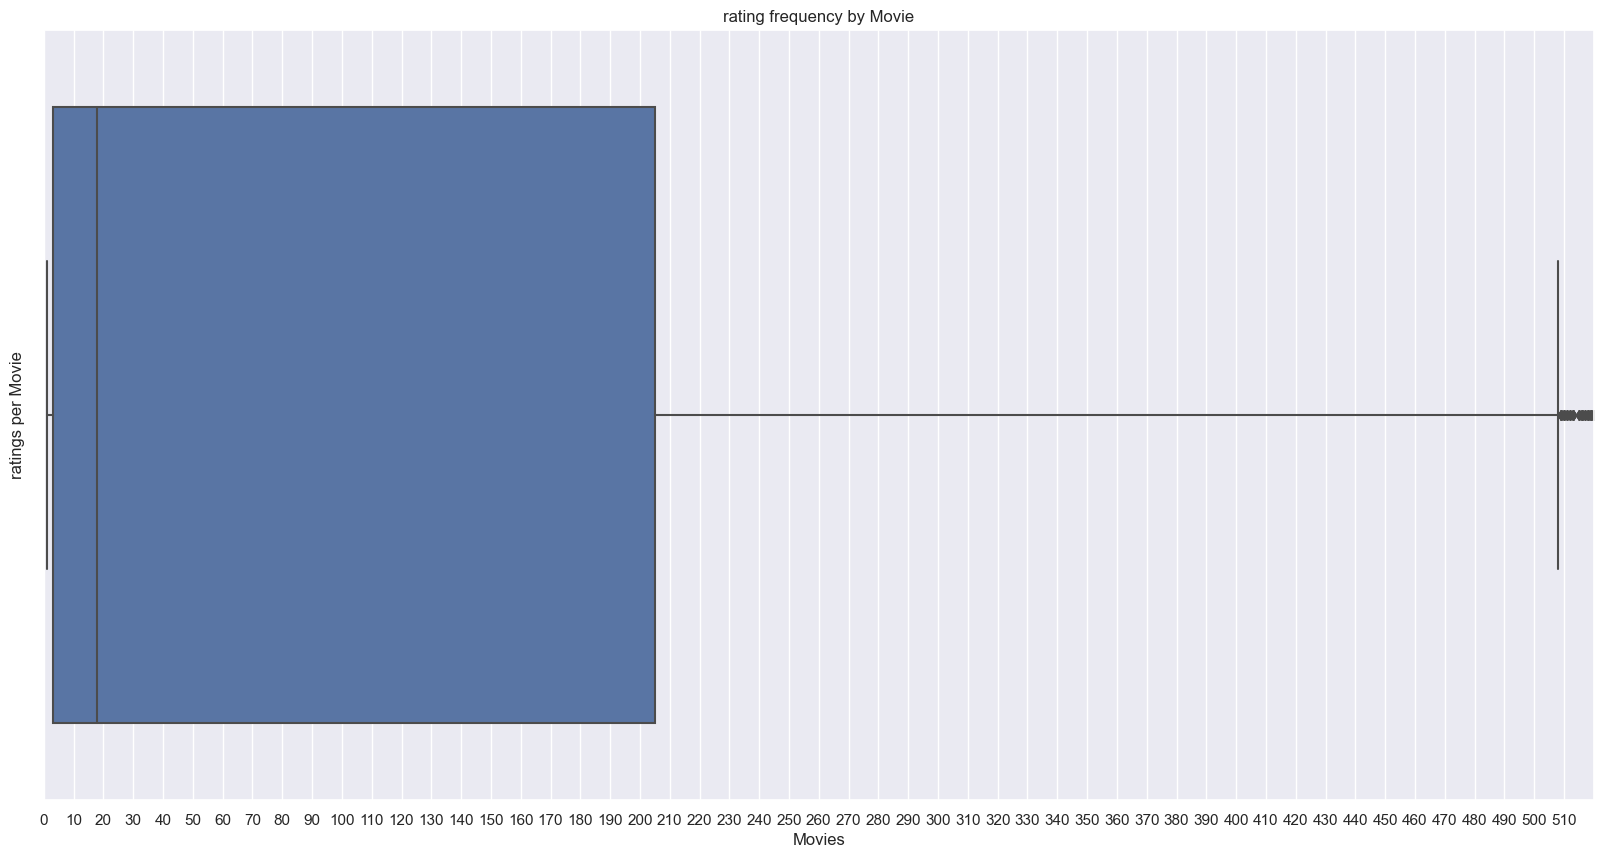

In [33]:
plt.pyplot.figure(figsize=(20, 10))
p = sns.boxplot(x=df_rating['movieId'].value_counts())
p.set(title='rating frequency by Movie', xlabel='ratings per Movie', ylabel='movies', xlim=(0,520), xticks=range(0,520,10));
#p.grid(visible=False, which= 'major',  axis='x');

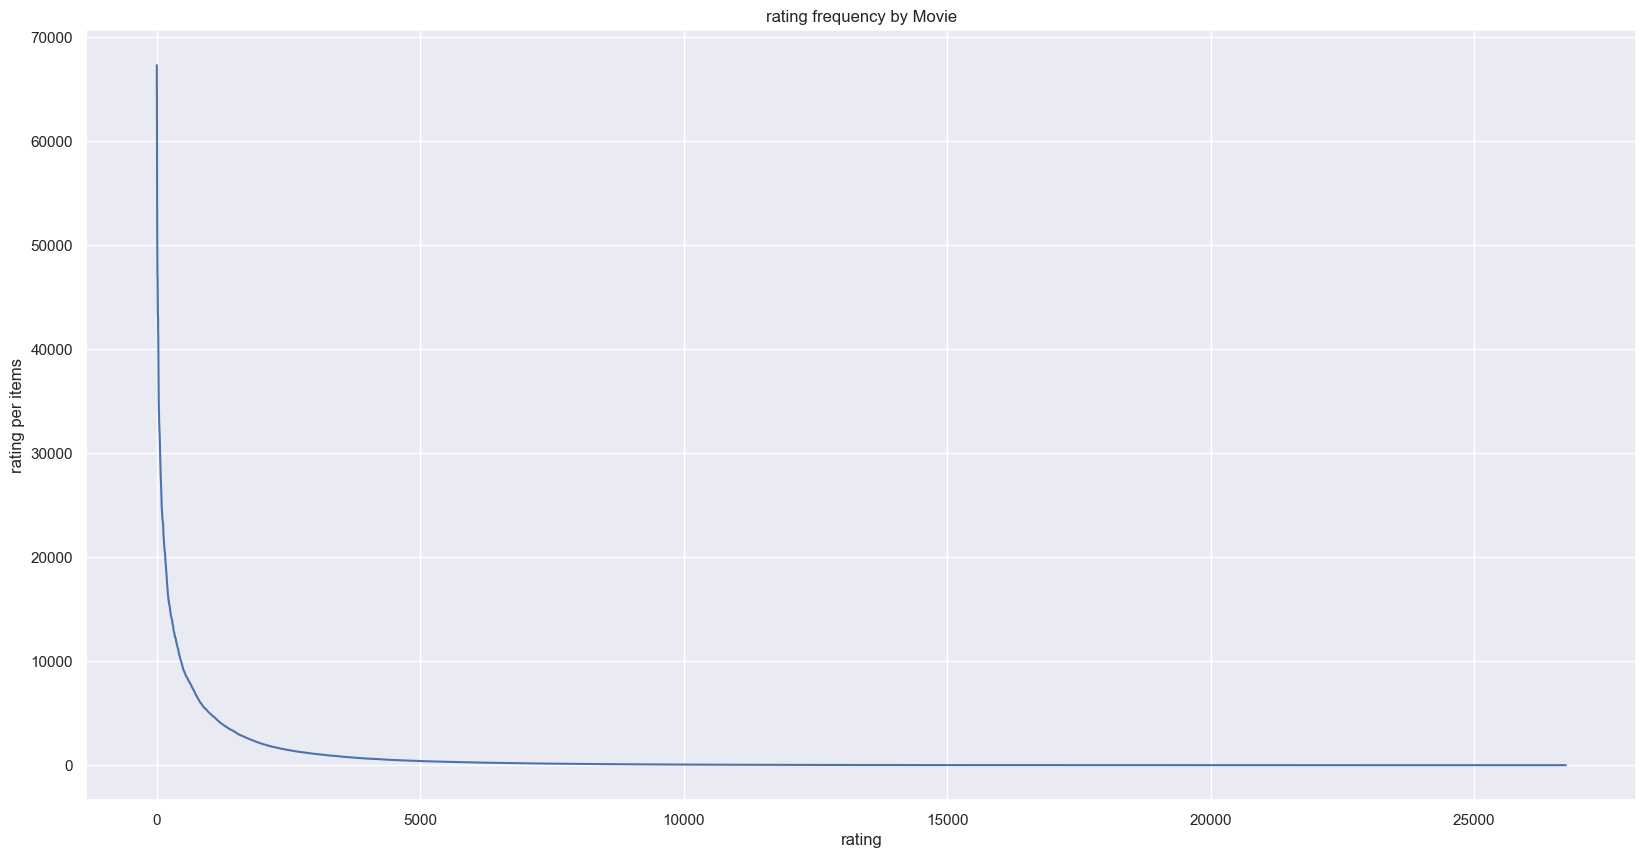

In [75]:
#Popularity
plt.pyplot.figure(figsize=(20, 10))
q = sns.lineplot(df_rating['movieId'].value_counts().sort_values(ascending=False, ignore_index=True))
q.set(xlabel='rating', ylabel='rating per items', title='rating frequency by Movie');

In [61]:
RatingPerMovie = df_rating['movieId'].value_counts()
print(f'{RatingPerMovie[RatingPerMovie>508].size} movies have been rated overproportionaly and are considered as outlier')
print('this is about %.2f procent of total movies which have recieved any rating' % ((RatingPerMovie[RatingPerMovie>508].size)*100/UserVsRating.size))

4454 movies have been rated overproportionaly and are considered as outlier
this is about 3.22 procent of total movies which have recieved any rating


In [15]:
df_tagspd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


In [16]:
df_tagspd['tag'].value_counts()

sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
Paul Adelstein                      1
the wig                             1
killer fish                         1
genetically modified monsters       1
topless scene                       1
Name: tag, Length: 38643, dtype: int64

In [17]:
df_tagspd['tag'].nunique()

38643

tags are missing in 7.733 movies.
37515 more tags than defined above in the tagID
--> we merge the tags.csv with genome.tags to have the "relevant" tags

In [78]:
df_tags=df_tagspd.merge(df_gtags, how='right', on='tag' ).drop('timestamp', axis =1)
print(df_tags['tag'].nunique())
print(df_tags.info())
print(df_tags['tag'].value_counts())
print(df_tags['movieId'].nunique())

1128
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217617 entries, 0 to 217616
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   217571 non-null  float64
 1   movieId  217571 non-null  float64
 2   tag      217617 non-null  object 
 3   tagId    217617 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 8.3+ MB
None
sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
oscar (best editing)                1
oscar (best animated feature)       1
almodovar                           1
cute!                               1
east germany                        1
Name: tag, Length: 1128, dtype: int64
12400


By merging the tags, we have 14878 (54%) less movies that have a genome tag than there is movieId.

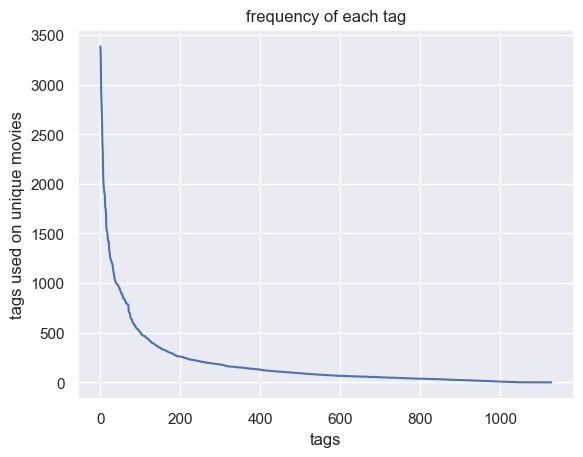

In [80]:
p = sns.lineplot(df_tags['tag'].value_counts().sort_values(ascending=False, ignore_index=True))
p.set(xlabel='tags', ylabel='tags used on unique movies', title='frequency of each tag');
#p.grid(visible=False, which= 'major',  axis='x');

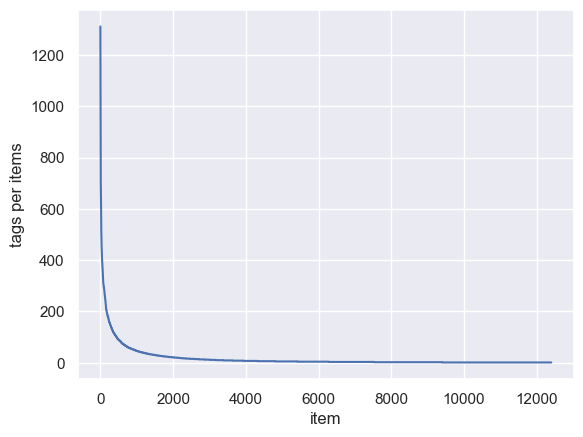

In [81]:
q = sns.lineplot(df_tags['movieId'].value_counts().sort_values(ascending=False, ignore_index=True))
q.set(xlabel='item', ylabel='tags per items');
#q.grid(visible=False, which= 'major',  axis='x');

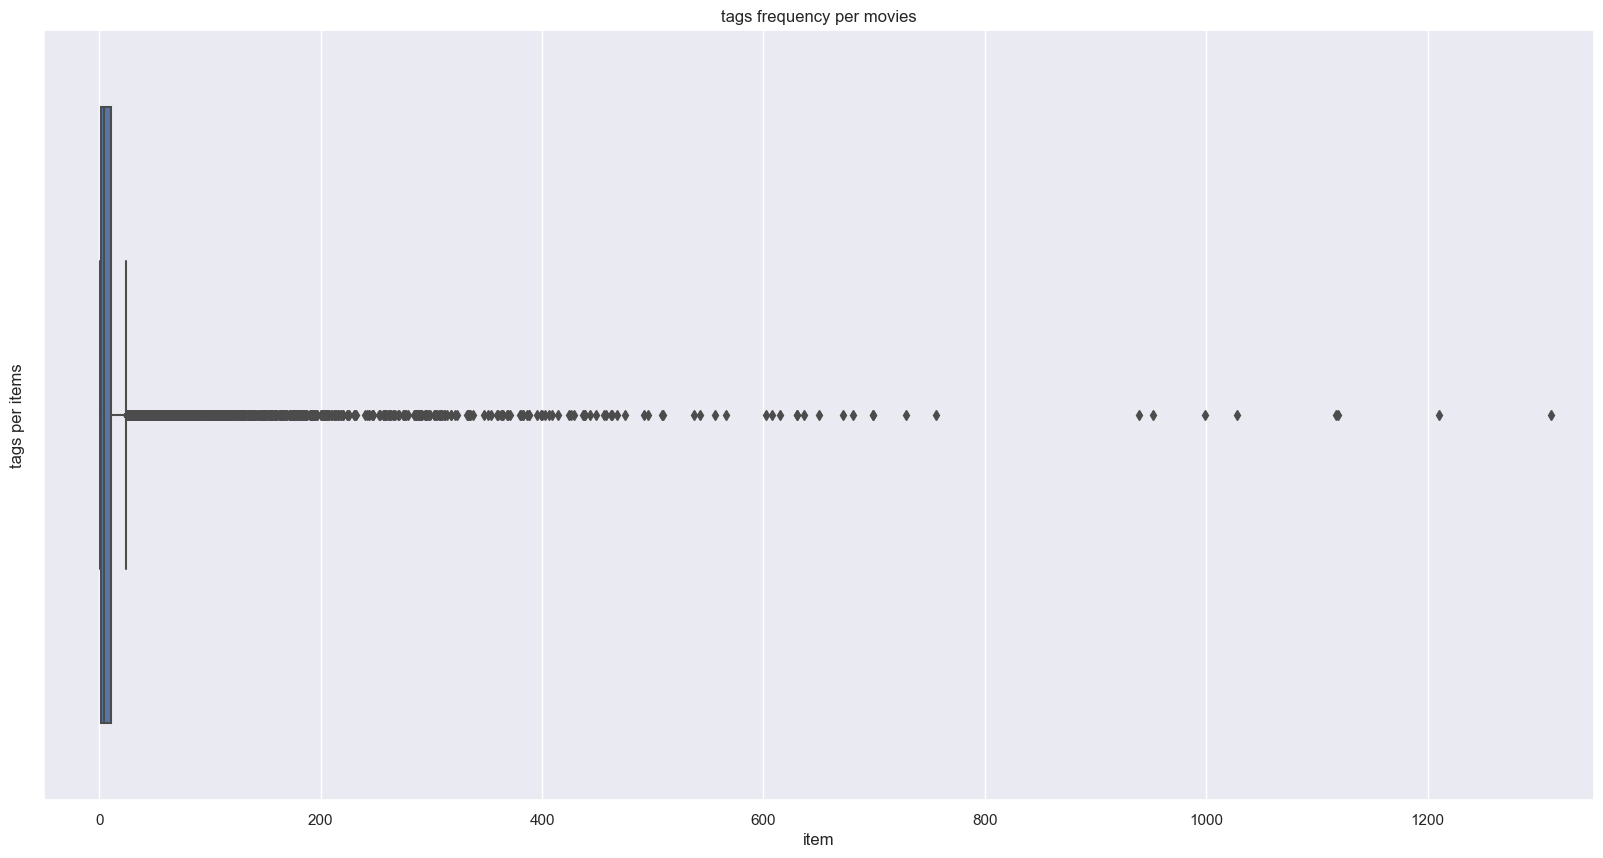

In [90]:
plt.pyplot.figure(figsize=(20, 10))
q = sns.boxplot(x=df_tags['movieId'].value_counts())
q.set(xlabel='item', ylabel='tags per items', title='tags frequency per movies', xlim=[-50,1350]);
#q.grid(visible=False, which= 'major',  axis='x');

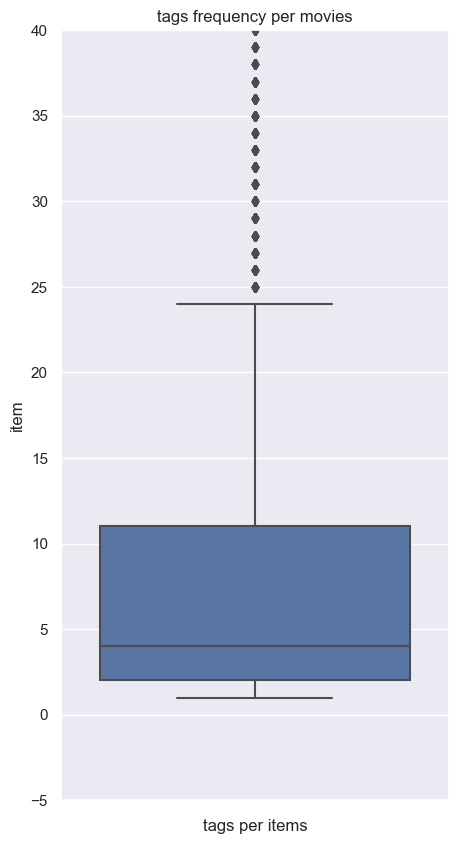

In [95]:
plt.pyplot.figure(figsize=(5, 10))
q = sns.boxplot(y=df_tags['movieId'].value_counts())
q.set(ylabel='item', xlabel='tags per items', title='tags frequency per movies', ylim=[-5,40]);
#q.grid(visible=False, which= 'major',  axis='x');

In [ ]:
#we merge all the data in a single data frame
df_all=df_tags.merge(df_rating, on='movieId', how='left').drop('timestamp', axis =1).merge(df_movies, on='movieId', how='left').merge(df_gscore, on='movieId', how='left')
df_all.info()

possible viz
x movie counts by genre
x rating by genre (boxplot)
x rating count by genre
x tags count by genre
x rating by rating count
- tags count by genre
x rating count by movies index ordered decreasing frequency of rating -> only a small fraction of the items are rated frequently. 
x same with tags

x user activity -> rating frequency by user
x avarage rating per user

- how taging over time (temporal trend)


usefull compenents from IMDB 
 - title.basic.tsv -> runtimeMinutes
 - title.akas.tsv -> language & Region (depends if MovieLense is US based or not)
 - title.crew.tsv -> director, maybe writer to proof the correlation
 - title.principals.tsv -> principal cast